# Golf Ball Drag Analysis

This notebook visualizes the custom variable drag model for a dimpled golf ball. It accounts for the changing Drag Coefficient ($C_d$) as the boundary layer transitions from laminar to turbulent flow.

We mirror the logic implemented in `src/derivative_functions.cpp`:
- **Laminar (Low Speed < 18 m/s):** $C_d \approx 0.55$
- **Transition (18 - 25 m/s):** $C_d$ drops linearly from 0.55 to 0.275.
- **Turbulent (High Speed > 25 m/s):** $C_d \approx 0.275$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def get_golf_cd(v):
    """
    Calculates the drag coefficient for a golf ball based on velocity.
    Mirrors logic in C++ function golf_ball_drag_deriv with fixed transition.
    """
    v_start = 18.0
    v_end = 25.0
    Cd_initial = 0.55
    Cd_final = 0.275
    
    if v < v_start:
        return Cd_initial
    elif v >= v_start and v <= v_end:
        # Linear drop
        ratio = (v - v_start) / (v_end - v_start)
        return Cd_initial - ratio * (Cd_initial - Cd_final)
    else:
        return Cd_final

# Vectorize for easy array processing
get_golf_cd_vec = np.vectorize(get_golf_cd)

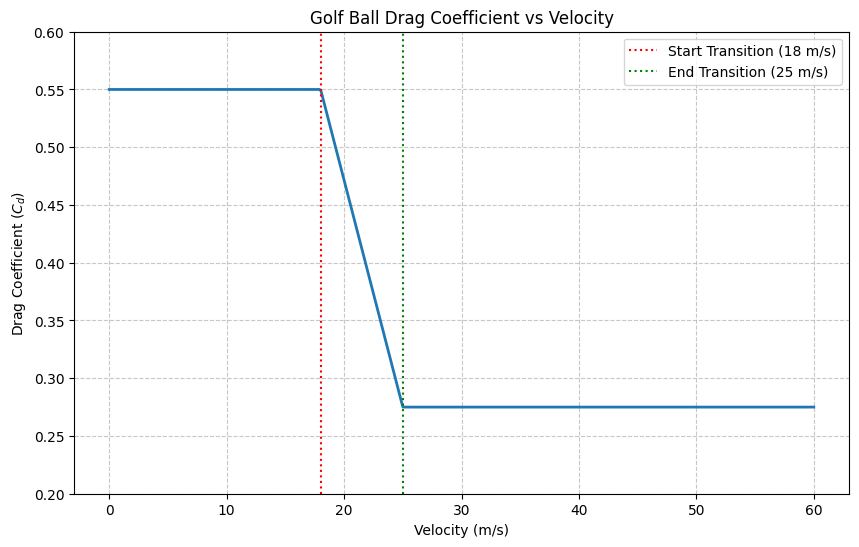

In [8]:
# Define velocity range (0 to 60 m/s covers typical golf swing speeds)
velocities = np.linspace(0, 60, 500)
cd_values = get_golf_cd_vec(velocities)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Velocity (m/s)')
ax1.set_ylabel('Drag Coefficient ($C_d$)')
ax1.plot(velocities, cd_values, linewidth=2)
ax1.grid(True, linestyle='--', alpha=0.7)

plt.title("Golf Ball Drag Coefficient vs Velocity")
plt.axvline(x=18.0, color='r', linestyle=':', label='Start Transition (18 m/s)')
plt.axvline(x=25.0, color='g', linestyle=':', label='End Transition (25 m/s)')
plt.legend(loc='upper right')

plt.ylim(0.2, 0.6) # Set meaningful Y limits

plt.show()